# <center> PROFIT OF A COMPANY PREDICTION

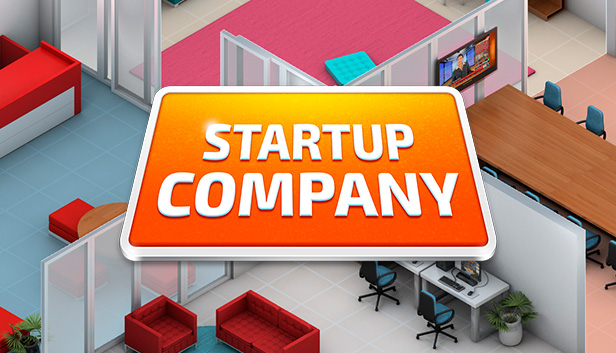

### This project determine the expected profit on startup of a company.

#### Import the Dependencies

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR


In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Performing Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.shape

(50, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [6]:
df.isnull().mean()*100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

### Univarite analysis

#### HISTOGRAM

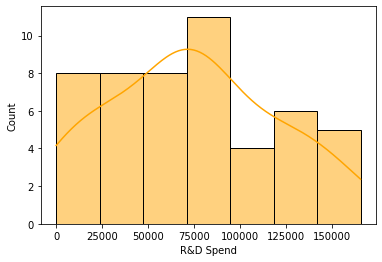

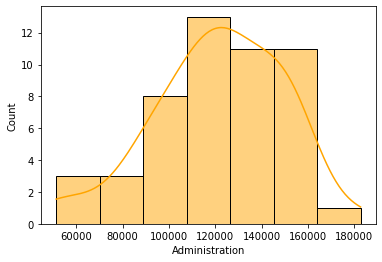

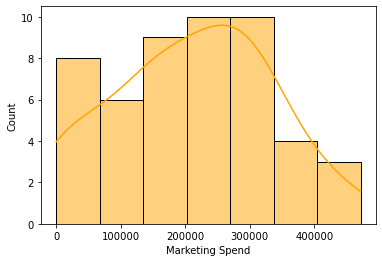

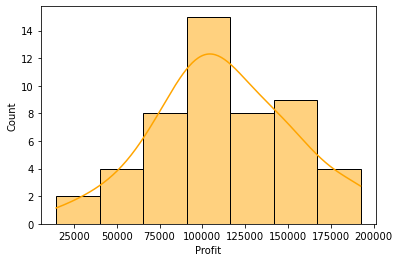

In [7]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color="orange")
        plt.show()
        

#### KDE PLOT

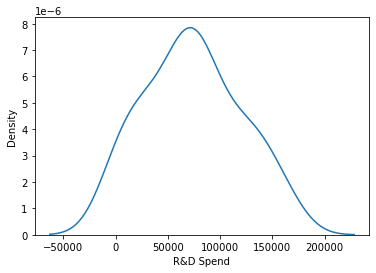

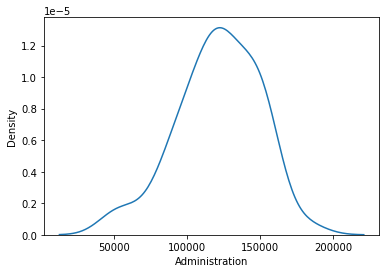

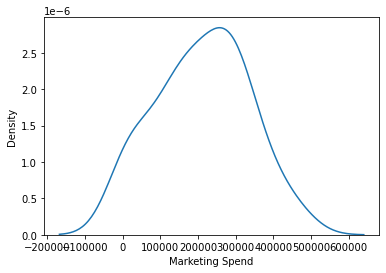

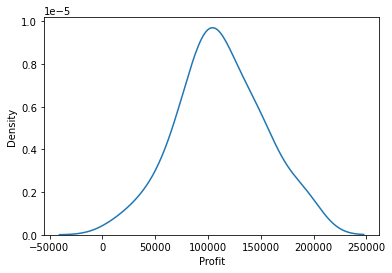

In [8]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(df[i])
    plt.show()

### BOX PLOT

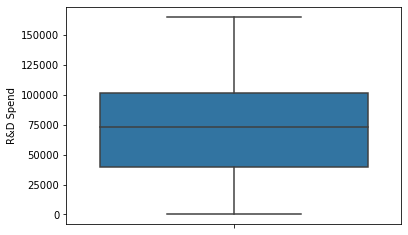

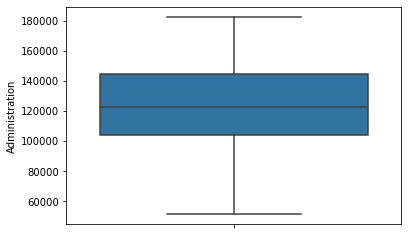

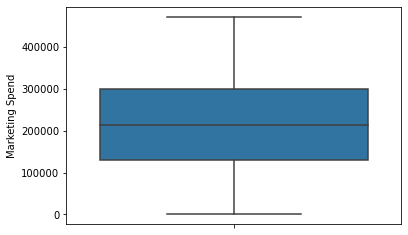

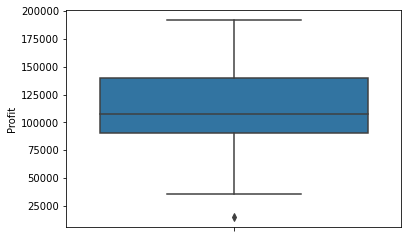

In [9]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i])
    plt.show()

### Multivariate analysis
#### Line plot

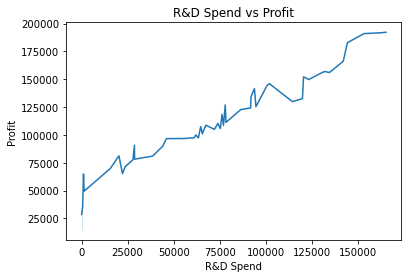

In [10]:
sns.lineplot('R&D Spend','Profit',data=df)
plt.title("R&D Spend vs Profit")
plt.show()

#### Pair plot

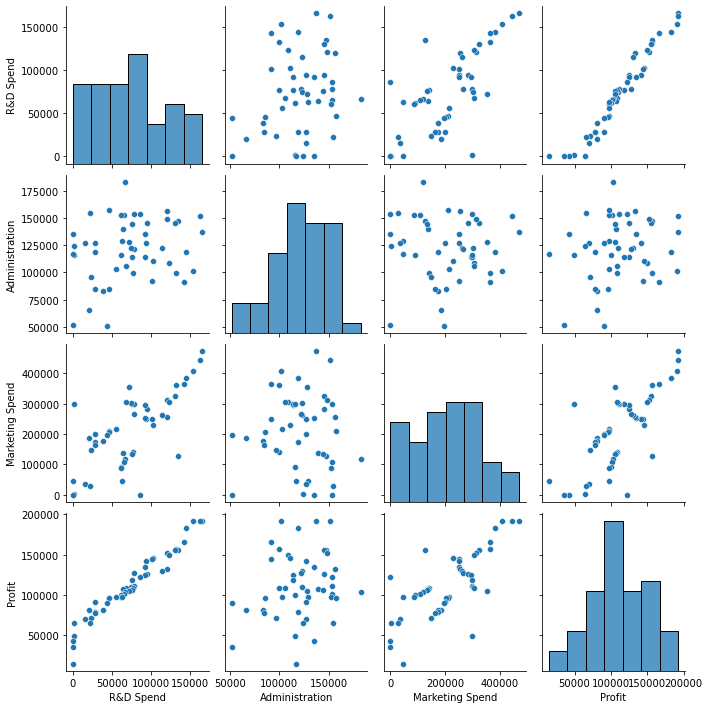

In [11]:
sns.pairplot(df)
plt.show()

### Pie chart

In [12]:
state_rdspend=df.groupby(['State'])['R&D Spend'].sum()

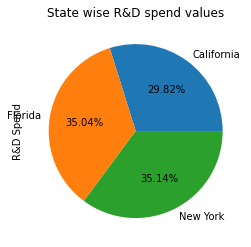

In [13]:
state_rdspend.sort_values(ascending=True).plot.pie(autopct='%.2f%%');
plt.title("State wise R&D spend values");

In [14]:
state_rdspend=df.groupby(['State'])['Marketing Spend'].sum()

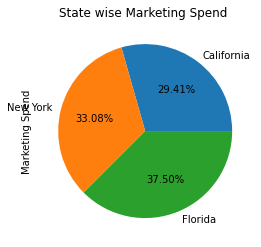

In [15]:
state_rdspend.sort_values(ascending=True).plot.pie(autopct='%.2f%%');
plt.title("State wise Marketing Spend ");

In [16]:
state_profit=df.groupby(['State'])['Profit'].sum()

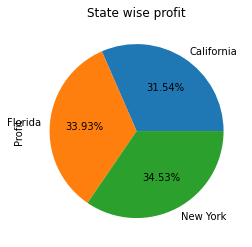

In [17]:
state_profit.sort_values(ascending=True).plot.pie(autopct='%.2f%%');
plt.title("State wise profit");

### Set the outliers

In [18]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL
    

In [19]:
for i in df.columns:
    if df[i].dtype != 'object':
        UL,LL= outlier_limit(df[i])        
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])
 

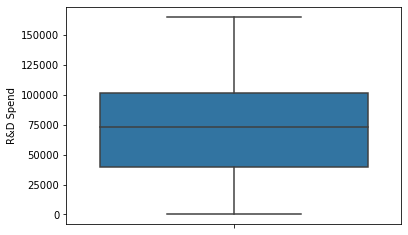

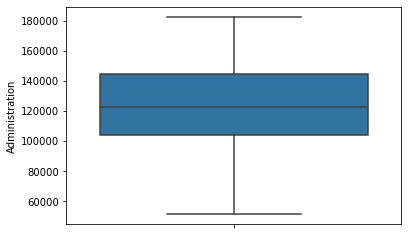

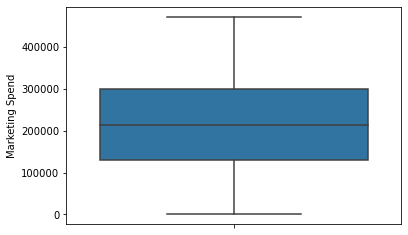

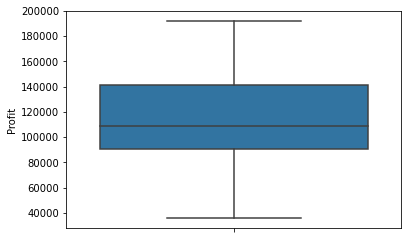

In [20]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show();

In [21]:
df.dropna(inplace=True)

In [22]:
le=LabelEncoder()

In [23]:
df["State"]=le.fit_transform(df.State)

In [24]:
df.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
35,46014.02,85047.44,205517.64,2,96479.51
5,131876.90,99814.71,362861.36,2,156991.12
13,91992.39,135495.07,252664.93,0,134307.35
15,114523.61,122616.84,261776.23,2,129917.04
43,15505.73,127382.30,35534.17,2,69758.98
32,63408.86,129219.61,46085.25,0,97427.84
20,76253.86,113867.30,298664.47,0,118474.03
10,101913.08,110594.11,229160.95,1,146121.95
9,123334.88,108679.17,304981.62,0,149759.96
30,61994.48,115641.28,91131.24,1,99937.59


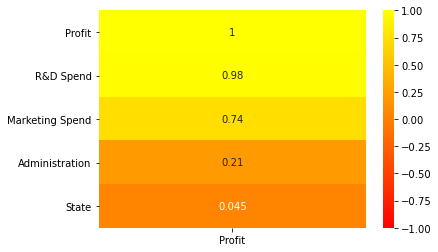

In [25]:
sns.heatmap(df.corr()[["Profit"]].sort_values(by="Profit",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

In [26]:
x=df[['Marketing Spend','R&D Spend']].values

In [27]:
y=df[['Profit']].values

## Model Buliding Using Cross Validation

In [28]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [29]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  7634.083409062136
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  7634.083407635891
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  7634.083409031899
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  43620.722529929866
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  15314.981319996612
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  15564.288483046807
*********************************************************

### Lasso Regressor has lowest RMSE value 

### Feature Scaling

In [30]:
sc = StandardScaler()

In [31]:
x=sc.fit_transform(x)

#### Splitting into training and testing


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

In [33]:
model= Lasso()

In [34]:
model.fit(x_train, y_train)

Lasso()

In [35]:
training_score = model.score(x_train, y_train)
training_score

0.9609742752221928

In [36]:
testing_score = model.score(x_test, y_test)
testing_score

0.952889269447255

#### R2 Score

In [37]:
score = r2_score(y_test, model.predict(x_test))*100
score

95.2889269447255

#### Mean absolute error

In [38]:
mae = mean_absolute_error(y_test, model.predict(x_test))
mae

5318.08306354287

#### Mean squared error

In [39]:
mse = mean_squared_error(y_test, model.predict(x_test))
mse

45917712.119160965

#### Testing the model using predict function

In [40]:
y_pred = model.predict(x)

In [41]:
output = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
output.head()

,ACTUAL,PREDICTED
0,192261.83,192785.222769
1,191792.06,189783.194288
2,191050.39,181492.700681
3,182901.99,173606.609641
4,166187.94,171312.459590


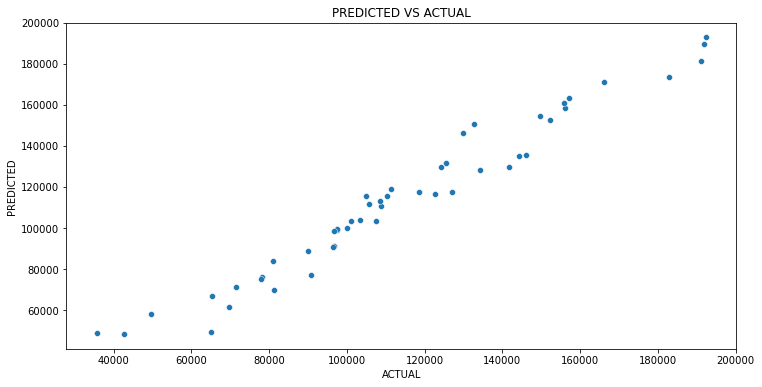

In [42]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL")
sns.scatterplot(data=output, x="ACTUAL", y = "PREDICTED");

#### As we can see that the predicted value is close to the actual values i.e the one present in the testing set, Hence we can use this model for prediction.